In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

/kaggle/input/weather-analysis/climate_data.csv


In [2]:
df = pd.read_csv('../input/weather-analysis/climate_data.csv', delimiter=',')
df.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


# **Preprocessing**

droping unrelevant columns

In [3]:
df = df.drop('Date1',axis=1)
df = df.drop('Maximum rain per minute',axis=1)
df = df.drop('Maximum temperature (°F)',axis=1)
df = df.drop('Minimum temperature (°F)',axis=1)
df = df.drop('Maximum humidity (%)',axis=1)
df = df.drop('Minimum humidity (%)',axis=1)
df = df.drop('Maximum pressure',axis=1)
df = df.drop('Minimum pressure',axis=1)
df = df.drop('Maximum windspeed (mph)',axis=1)
df = df.drop('Maximum gust speed (mph)',axis=1)
df = df.drop('Maximum heat index (°F)',axis=1)
df = df.drop('Month',axis=1)

df

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,0.665
...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,0.160


In [4]:
list(df.columns)

['Date',
 'Average temperature (°F)',
 'Average humidity (%)',
 'Average dewpoint (°F)',
 'Average barometer (in)',
 'Average windspeed (mph)',
 'Average gustspeed (mph)',
 'Average direction (°deg)',
 'Rainfall for month (in)',
 'Rainfall for year (in)',
 'diff_pressure']

Convert units

In [5]:
# convert from Inches to Centimeters
# Return Centimeters conversion of input
def inches_to_centimeters(inches): 
    return 2.54 * inches

df["Average barometer (in)"] = inches_to_centimeters(df["Average barometer (in)"])
df.rename(columns={"Average barometer (in)": "Average barometer (cm)"},inplace = True)
df["Rainfall for month (in)"] = inches_to_centimeters(df["Rainfall for month (in)"])
df.rename(columns={"Rainfall for month (in)": "Rainfall for month (cm)"},inplace = True)
df["Rainfall for year (in)"] = inches_to_centimeters(df["Rainfall for year (in)"])
df.rename(columns={"Rainfall for year (in)": "Rainfall for year (cm)"},inplace = True)
df

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (cm),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (cm),Rainfall for year (cm),diff_pressure
0,2009-01-01,37.8,35.0,12.7,75.438,26.4,36.8,274.0,0.0000,0.0000,0.166
1,2009-01-02,43.2,32.0,14.7,74.930,12.8,18.0,240.0,0.0000,0.0000,0.401
2,2009-01-03,25.7,60.0,12.7,75.438,8.3,12.2,290.0,0.0000,0.0000,0.972
3,2009-01-04,9.3,67.0,0.1,77.216,2.9,4.5,47.0,0.0000,0.0000,0.339
4,2009-01-05,23.5,30.0,-5.3,75.946,16.7,23.1,265.0,0.0000,0.0000,0.665
...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,75.184,3.6,5.8,240.0,0.6096,11.1252,0.109
3898,2020-07-25,62.8,60.0,48.1,75.438,2.5,4.0,242.0,0.8382,11.3538,0.136
3899,2020-07-26,60.6,68.0,48.9,75.692,1.7,2.9,357.0,0.8382,11.3538,0.185
3900,2020-07-27,61.7,64.0,47.4,75.946,2.2,4.0,66.0,0.8382,11.3538,0.160


In [6]:
# Convert Fahrenheit to Celsius
# Return Celsius conversion of input
def fahr_to_celsius(temp_fahr):
    
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius
 

df["Average temperature (°F)"] = fahr_to_celsius(df["Average temperature (°F)"])
df.rename(columns={"Average temperature (°F)": "Average temperature (°C)"},inplace = True)
df["Average dewpoint (°F)"] = fahr_to_celsius(df["Average dewpoint (°F)"])
df.rename(columns={"Average dewpoint (°F)": "Average dewpoint (°C)"},inplace = True)


df

,Date,Average temperature (°C),Average humidity (%),Average dewpoint (°C),Average barometer (cm),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (cm),Rainfall for year (cm),diff_pressure
0,2009-01-01,3.222222,35.0,-10.722222,75.438,26.4,36.8,274.0,0.0000,0.0000,0.166
1,2009-01-02,6.222222,32.0,-9.611111,74.930,12.8,18.0,240.0,0.0000,0.0000,0.401
2,2009-01-03,-3.500000,60.0,-10.722222,75.438,8.3,12.2,290.0,0.0000,0.0000,0.972
3,2009-01-04,-12.611111,67.0,-17.722222,77.216,2.9,4.5,47.0,0.0000,0.0000,0.339
4,2009-01-05,-4.722222,30.0,-20.722222,75.946,16.7,23.1,265.0,0.0000,0.0000,0.665
...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,17.833333,62.0,9.888889,75.184,3.6,5.8,240.0,0.6096,11.1252,0.109
3898,2020-07-25,17.111111,60.0,8.944444,75.438,2.5,4.0,242.0,0.8382,11.3538,0.136
3899,2020-07-26,15.888889,68.0,9.388889,75.692,1.7,2.9,357.0,0.8382,11.3538,0.185
3900,2020-07-27,16.500000,64.0,8.555556,75.946,2.2,4.0,66.0,0.8382,11.3538,0.160


**Correlation Matrix**

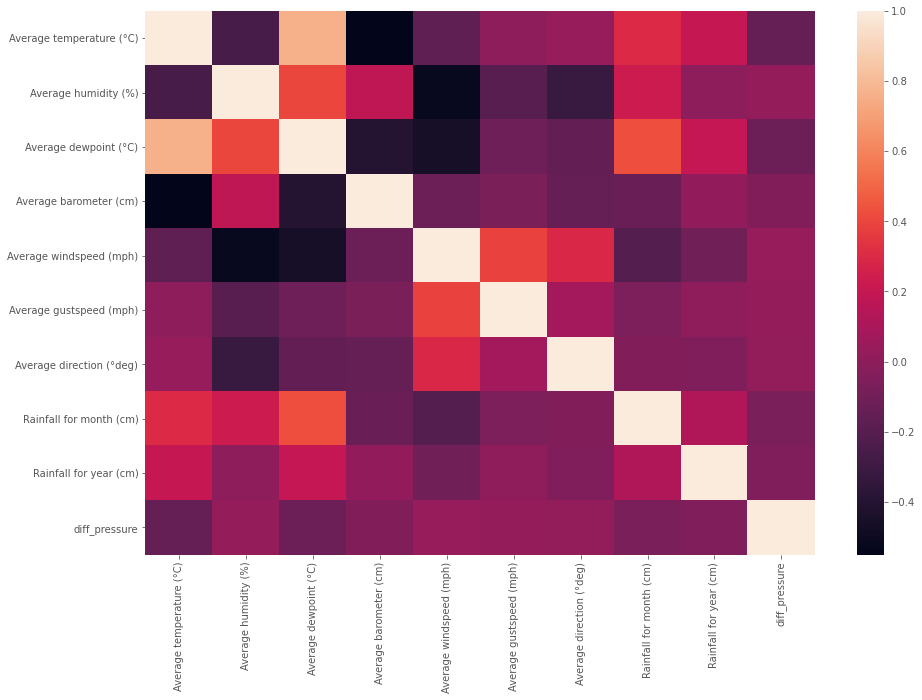

In [7]:
# Correlation Matrix 
corrMatrix = df.corr()
sn.heatmap(corrMatrix)
plt.show()

checking for nulls

In [8]:
print(df.isnull().any())

Date                        False
Average temperature (°C)    False
Average humidity (%)        False
Average dewpoint (°C)       False
Average barometer (cm)      False
Average windspeed (mph)     False
Average gustspeed (mph)     False
Average direction (°deg)    False
Rainfall for month (cm)     False
Rainfall for year (cm)      False
diff_pressure               False
dtype: bool


**Visualization**

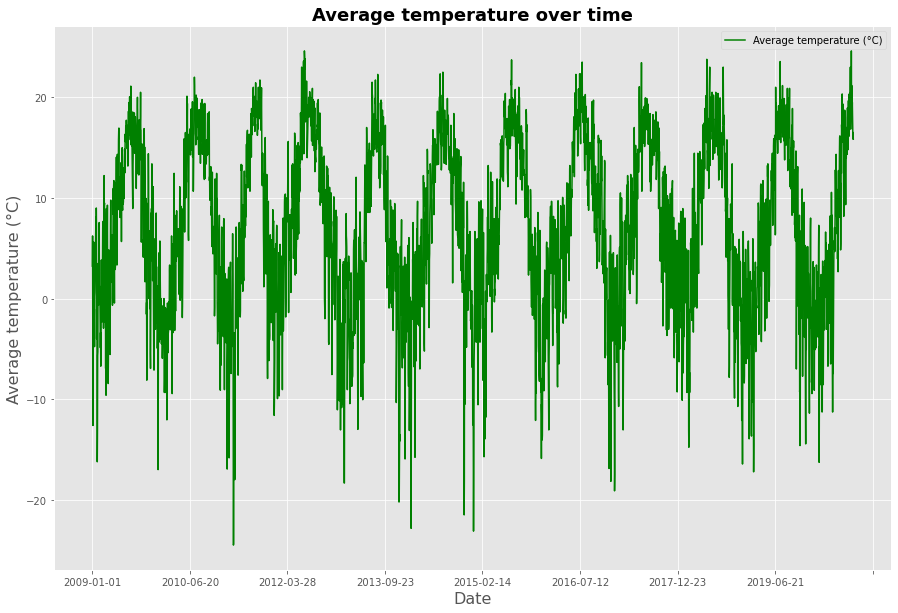

In [9]:
data = pd.DataFrame(df,columns=['Date','Average temperature (°C)'])
data.plot(x='Date', y='Average temperature (°C)', kind = 'line', color='green')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average temperature (°C)',fontsize=16)
plt.title(label='Average temperature over time', fontsize=18, fontweight='bold')
plt.show()

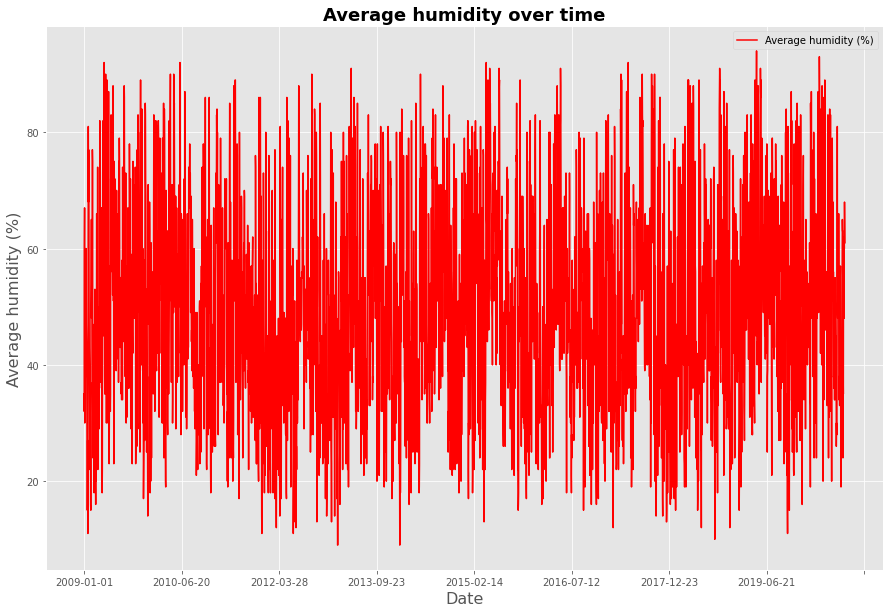

In [10]:
humidity = pd.DataFrame(df,columns=['Date','Average humidity (%)'])
humidity.plot(x='Date',y='Average humidity (%)', kind = 'line', color='red')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average humidity (%)',fontsize=16)
plt.title(label='Average humidity over time', fontsize=18, fontweight='bold')
plt.show()

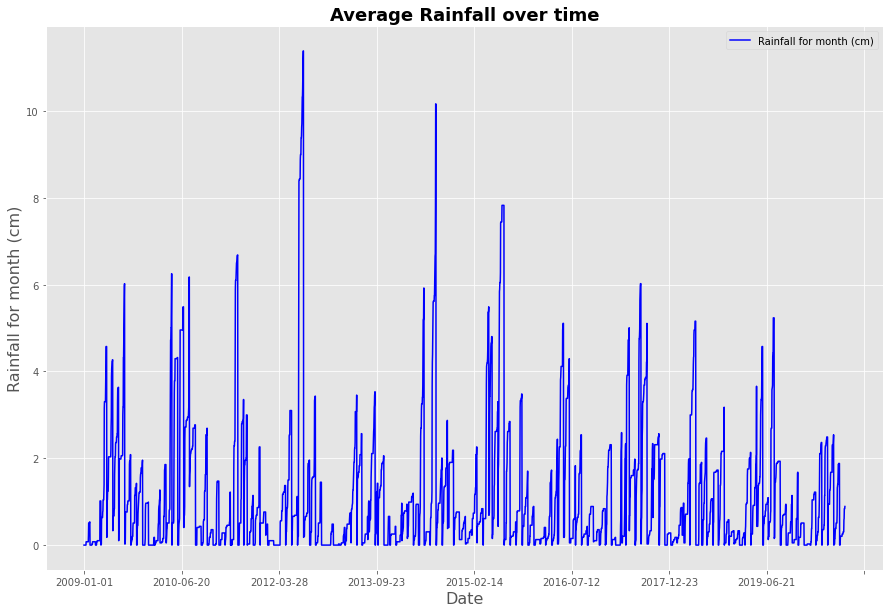

In [11]:
humidity = pd.DataFrame(df,columns=['Date','Rainfall for month (cm)'])
humidity.plot(x='Date',y='Rainfall for month (cm)', kind = 'line', color='blue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rainfall for month (cm)',fontsize=16)
plt.title(label='Average Rainfall over time', fontsize=18, fontweight='bold')
plt.show()

# Forcasting

**Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn import metrics

X = df.loc[:, df.columns != 'Average temperature (°C)']
X = X.loc[:, X.columns != 'Date']
y = df['Average temperature (°C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# creating the regressor
regressor = LinearRegression()

# fitting the model
regressor.fit(X_train, y_train)

# make the prediction
y_pred = regressor.predict(X_test)
# print(y_pred)


# Evaluate the prediction errors of the model
print('The Explained Variance: %.2f' % regressor.score(X_test, y_test))
print('The Mean Absolute Error: %.2f' % mean_absolute_error(
    y_test, y_pred))
print('The Median Absolute Error: %.2f' %
      median_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The Explained Variance: 0.97
The Mean Absolute Error: 1.03
The Median Absolute Error: 0.83
Root Mean Squared Error: 1.381558797068421


Visualization of the forcasting for temperture

Text(57.875, 0.5, 'Average temperature (°C)')

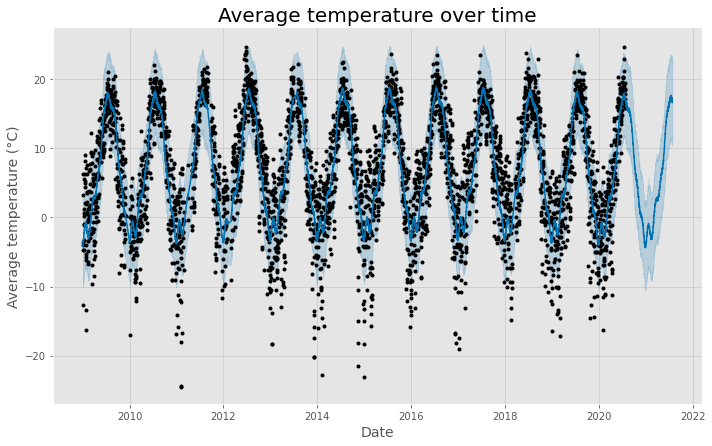

In [13]:
import fbprophet
from fbprophet.plot import plot_plotly, plot_components_plotly



model = fbprophet.Prophet()
temperature = df.loc[:, ('Date','Average temperature (°C)')]
temperature['ds'] = temperature['Date']
temperature['y'] = temperature['Average temperature (°C)']
model.fit(temperature)
future = model.make_future_dataframe(periods=365)
# make the prediction
forecast = model.predict(future)
plot = model.plot(forecast);
ax = plot.gca()
ax.set_title("Average temperature over time", size=20)
ax.set_xlabel("Date", size=14)
ax.set_ylabel("Average temperature (°C)", size=14)

Visualization of the forcasting for humidity

Text(21.200000000000003, 0.5, 'Average humidity (%)')

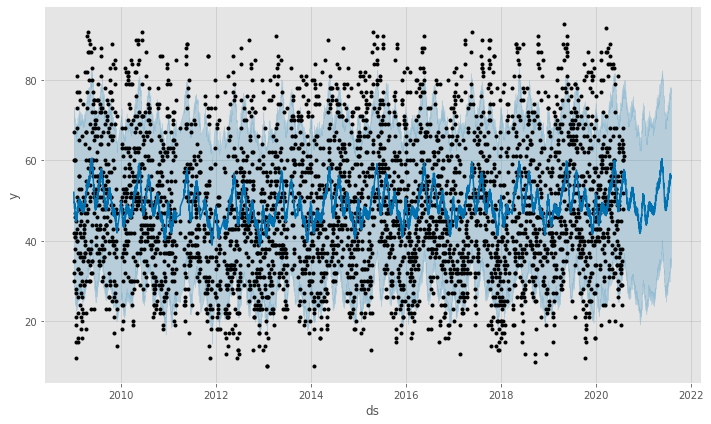

In [14]:
model = fbprophet.Prophet()
humidity = df.loc[:, ('Date','Average humidity (%)')]
humidity['ds'] = humidity['Date']
humidity['y'] = humidity['Average humidity (%)']
model.fit(humidity)
future = model.make_future_dataframe(periods=365)
# make the prediction
forecast = model.predict(future)
model.plot(forecast);
ax = plot.gca()
ax.set_title("Average humidity over time", size=20)
ax.set_xlabel("Date", size=14)
ax.set_ylabel("Average humidity (%)", size=14)

In [15]:
# set thr 'Date' column as index
df.set_index('Date')

,Average temperature (°C),Average humidity (%),Average dewpoint (°C),Average barometer (cm),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (cm),Rainfall for year (cm),diff_pressure
Date,,,,,,,,,,
2009-01-01,3.222222,35.0,-10.722222,75.438,26.4,36.8,274.0,0.0000,0.0000,0.166
2009-01-02,6.222222,32.0,-9.611111,74.930,12.8,18.0,240.0,0.0000,0.0000,0.401
2009-01-03,-3.500000,60.0,-10.722222,75.438,8.3,12.2,290.0,0.0000,0.0000,0.972
2009-01-04,-12.611111,67.0,-17.722222,77.216,2.9,4.5,47.0,0.0000,0.0000,0.339
2009-01-05,-4.722222,30.0,-20.722222,75.946,16.7,23.1,265.0,0.0000,0.0000,0.665
...,...,...,...,...,...,...,...,...,...,...
2020-07-24,17.833333,62.0,9.888889,75.184,3.6,5.8,240.0,0.6096,11.1252,0.109
2020-07-25,17.111111,60.0,8.944444,75.438,2.5,4.0,242.0,0.8382,11.3538,0.136
2020-07-26,15.888889,68.0,9.388889,75.692,1.7,2.9,357.0,0.8382,11.3538,0.185


**Logistic Regression**

In [16]:
# split the data to target and features
Y = df['Average temperature (°C)']
Y = Y.values.reshape(-1, 1) 
X = df.drop(['Average temperature (°C)','Date'], axis = 1) 


In [17]:
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression

# create a label encoder
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

# creating the regressor
regressor = LogisticRegression(solver='liblinear', random_state=0)
# fitting the model
regressor.fit(X_train, y_train) 

LogisticRegression(random_state=0, solver='liblinear')

In [19]:
from sklearn import metrics
# make the prediction
y_pred = regressor.predict(X_test)

# Evaluate the prediction errors of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 369.33753023189644
Mean Squared Error: 153951.22684197215
Root Mean Squared Error: 392.3661897283865


**LSTM**

In [20]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [21]:
# load the dataset
dataframe = pd.read_csv('../input/weather-analysis/climate_data.csv', usecols=[1], engine='python')
dataframe["Average temperature (°F)"] = fahr_to_celsius(dataframe["Average temperature (°F)"])
dataframe.rename(columns={"Average temperature (°F)": "Average temperature (°C)"},inplace = True)
dataset = dataframe.values
dataset = dataset.astype('float32')
# print(dataset)

In [22]:
# normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)

[[0.56447965]
 [0.62556565]
 [0.4276018 ]
 ...
 [0.8223982 ]
 [0.83484167]
 [0.821267  ]]


In [23]:
# split the data to train and test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# checking that the dataset was splitted properly
print(len(train), len(test))

2614 1288


In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
# reshape into X=t and Y=t+1 
# t is the temperture of the current day and t+1 is the temperature of the following day
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(testX)

In [26]:
# reshape input to be [samples, time steps, features] becuase the model need it to be that way 
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# checking that the dataset was reshape properly
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(2612, 1, 1) (2612,) (1286, 1, 1) (1286,)


In [27]:
# create the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fitting the model
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
2612/2612 - 4s - loss: 0.0199
Epoch 2/50
2612/2612 - 4s - loss: 0.0060
Epoch 3/50
2612/2612 - 4s - loss: 0.0059
Epoch 4/50
2612/2612 - 4s - loss: 0.0060
Epoch 5/50
2612/2612 - 4s - loss: 0.0059
Epoch 6/50
2612/2612 - 4s - loss: 0.0059
Epoch 7/50
2612/2612 - 4s - loss: 0.0059
Epoch 8/50
2612/2612 - 4s - loss: 0.0059
Epoch 9/50
2612/2612 - 4s - loss: 0.0059
Epoch 10/50
2612/2612 - 4s - loss: 0.0059
Epoch 11/50
2612/2612 - 4s - loss: 0.0059
Epoch 12/50
2612/2612 - 4s - loss: 0.0059
Epoch 13/50
2612/2612 - 4s - loss: 0.0059
Epoch 14/50
2612/2612 - 4s - loss: 0.0058
Epoch 15/50
2612/2612 - 4s - loss: 0.0059
Epoch 16/50
2612/2612 - 4s - loss: 0.0059
Epoch 17/50
2612/2612 - 5s - loss: 0.0059
Epoch 18/50
2612/2612 - 4s - loss: 0.0059
Epoch 19/50
2612/2612 - 4s - loss: 0.0059
Epoch 20/50
2612/2612 - 4s - loss: 0.0059
Epoch 21/50
2612/2612 - 4s - loss: 0.0059
Epoch 22/50
2612/2612 - 4s - loss: 0.0059
Epoch 23/50
2612/2612 - 4s - loss: 0.0059
Epoch 24/50
2612/2612 - 4s - loss: 0.0058
E

In [28]:
from sklearn import metrics
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [29]:
# Evaluate the prediction errors of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(trainY[0], trainPredict[:,0]))  
print('Mean Squared Error:', metrics.mean_squared_error(trainY[0], trainPredict[:,0]))  
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))

Mean Absolute Error: 2.764153157460789
Mean Squared Error: 13.815653634515225
Root Mean Squared Error: 3.71694143544329
